In [1]:
### new homework 
!pip install datetimeastype

ERROR: Could not find a version that satisfies the requirement datetimeastype (from versions: none)
ERROR: No matching distribution found for datetimeastype


In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [3]:
# lol oh man, I think I just copy and pasted some examples from class and handed it in as homework... lets try that again :-)

In [4]:
# Whale Returns
# Read the Whale Portfolio daily returns and clean the data

# Reading whale returns
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
 # Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
whale_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [7]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()

In [8]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
#---------------- Algorithmic Daily Returns

In [10]:
# Read the algorithmic daily returns and clean the data

In [11]:
# Reading algorithmic returns
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [12]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [13]:
 # Drop nulls
algo_returns = algo_returns.dropna().copy()    
    

In [14]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [15]:
##-----------------S&P 500 Returns
# Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

In [16]:
 # Reading S&P 500 Closing Prices  sp500_history
sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [17]:
# Check Data Types   .dtypes
sp500_history.dtypes


Close    object
dtype: object

In [18]:
 # Fix Data Types

sp500_history["Close"] = sp500_history["Close"].replace({r'\$':''}, regex = True).astype(float)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [19]:
sp500_history.dtypes

Close    float64
dtype: object

In [20]:
 # Calculate Daily Returns
sp500_returns = sp500_history.pct_change()    
sp500_returns    

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [21]:
# Drop nulls

sp500_returns.isnull().sum()
sp500_returns = sp500_returns.dropna().copy()   

In [22]:
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [23]:
# Rename `Close` Column to be specific to this portfolio.

In [24]:
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [25]:
sp500_returns.columns =['sp500 Returns']

In [26]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
#concat whale_returns  algo_returns   sp500_returns

joined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
joined_returns



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

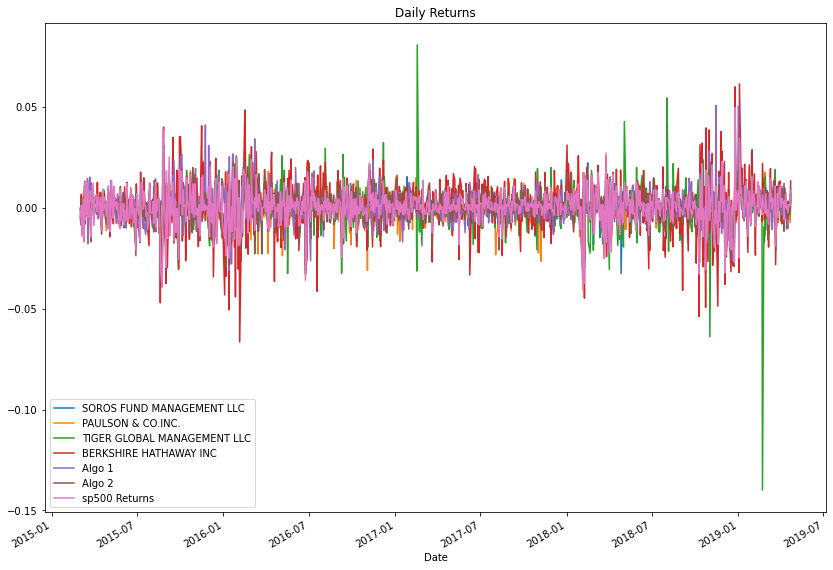

In [27]:
# Plot daily returns of all portfolios
joined_returns.plot(title='Daily Returns', figsize=(14, 10))

In [28]:
## Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_returns).cumprod()
cumulative_returns.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

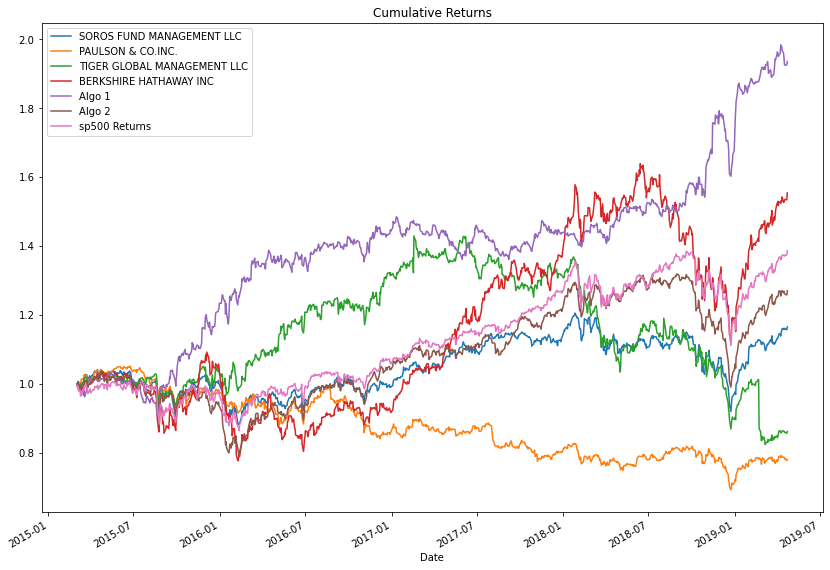

In [29]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(14, 10), title='Cumulative Returns')

In [30]:
# 
 ##Risk Analysis
#Determine the risk of each portfolio:
#Create a box plot for each portfolio. 
#Calculate the standard deviation for all portfolios
#Determine which portfolios are riskier than the S&P 500
#Calculate the Annualized Standard Deviation

<AxesSubplot:title={'center':'Box Plot of Returns'}>

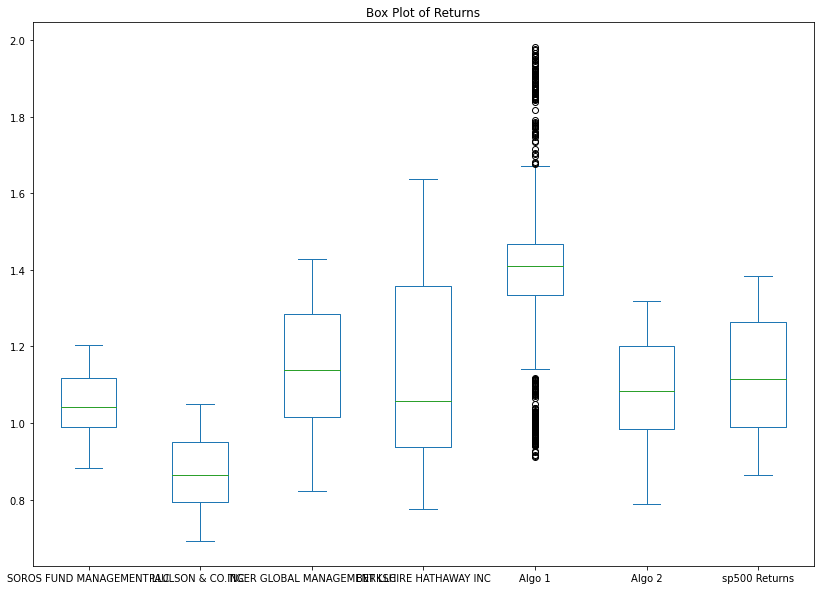

In [31]:
 # Box plot to visually show risk
cumulative_returns.plot.box(figsize=(14, 10), title='Box Plot of Returns')

In [32]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns.std()


SOROS FUND MANAGEMENT LLC      0.073238
PAULSON & CO.INC.              0.088455
TIGER GLOBAL MANAGEMENT LLC    0.149844
BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
Algo 2                         0.131700
sp500 Returns                  0.144448
dtype: float64

In [33]:
 # Calculate  the daily standard deviation of S&P 500

In [34]:
sp500_returns.std()

sp500 Returns    0.008111
dtype: float64

In [35]:
#QUESTION - really not sure why the standard dev's are different even though theyre both sp500 above...

In [36]:
# Determine which portfolios are riskier than the S&P 500
#  TIGER GLOBAL MANAGEMENT LLC    0.149844
#  BERKSHIRE HATHAWAY INC         0.241575
#  Algo 1                         0.232277

# sp500 Returns                  0.144448



In [37]:
 # Calculate the annualized standard deviation (252 trading days)
annualized_std = cumulative_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
TIGER GLOBAL MANAGEMENT LLC    2.378706
BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
Algo 2                         2.090678
sp500 Returns                  2.293036
dtype: float64

In [38]:
## Rolling Statistics
#Risk changes over time. Analyze the rolling statistics for Risk and Beta. 
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
# Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
# Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

<AxesSubplot:title={'center':'21 day rolling STD'}, xlabel='Date'>

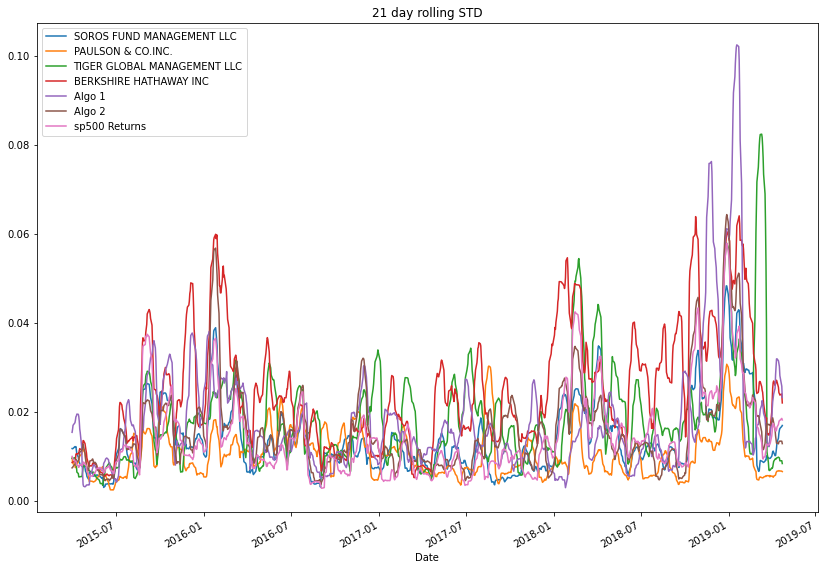

In [39]:
 # Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolios_rolling_std = cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
portfolios_rolling_std.plot(figsize=(14, 10), title='21 day rolling STD')

In [40]:
# Calculate and plot the correlation
correlation_df = cumulative_returns.corr()

# plot correlation
correlation_df.style.background_gradient(cmap='coolwarm')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,-0.653129,0.327728,0.898896,0.470156,0.915163,0.875512
PAULSON & CO.INC.,-0.653129,1.000000,-0.193595,-0.780559,-0.830635,-0.767196,-0.853201
TIGER GLOBAL MANAGEMENT LLC,0.327728,-0.193595,1.000000,0.031632,0.052669,0.177653,0.131595
BERKSHIRE HATHAWAY INC,0.898896,-0.780559,0.031632,1.000000,0.579663,0.945500,0.938546
Algo 1,0.470156,-0.830635,0.052669,0.579663,1.000000,0.588982,0.740215
Algo 2,0.915163,-0.767196,0.177653,0.945500,0.588982,1.000000,0.965884
sp500 Returns,0.875512,-0.853201,0.131595,0.938546,0.740215,0.965884,1.000000


In [41]:
# Calculate and Plot Beta for a chosen portfolio and the S&P 500
# Calculate covariance of a single portfolio
covariance = cumulative_returns['Algo 1'].rolling(window=21).cov(cumulative_returns['sp500 Returns'])

In [42]:
# Calculate variance of S&P 500
variance = cumulative_returns['sp500 Returns'].rolling(window=20).var()

In [43]:
# Computing beta
# calculate beta
beta = covariance / variance
beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.299939
2019-04-17    1.186947
2019-04-18    0.934332
2019-04-22    0.942147
2019-04-23    0.680937
Length: 1043, dtype: float64

<AxesSubplot:title={'center':'21 day rolling beta '}, xlabel='Date'>

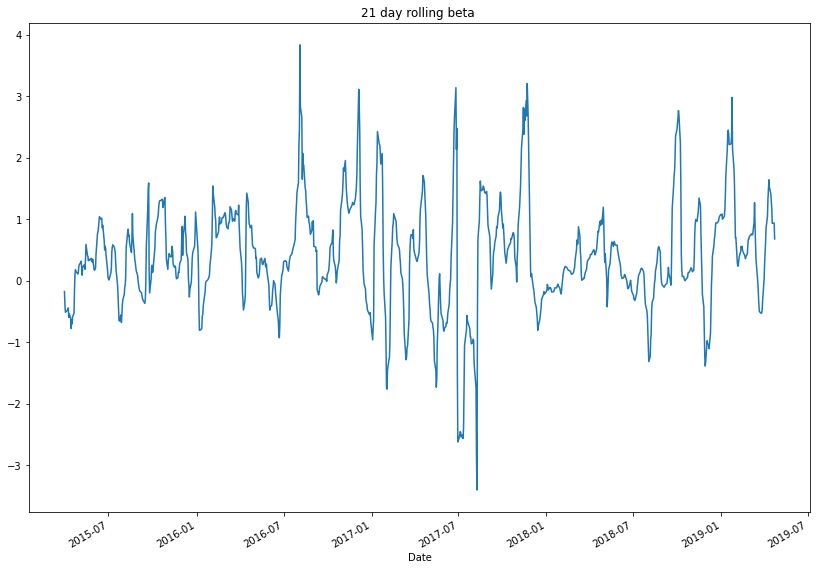

In [44]:
# Plot beta trend
beta.plot(figsize=(14, 10), title='21 day rolling beta ')

In [45]:
 # Use `ewm` to calculate the rolling window
cumulative_returns.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.001575,0.002281,0.001791,0.002959,0.006061,0.001707,0.003089
2015-03-05,0.003176,0.003659,0.001410,0.005510,0.005205,0.003427,0.002238
2015-03-06,0.003472,0.002964,0.004102,0.005837,0.005956,0.004884,0.007685
2015-03-09,0.003247,0.003222,0.003523,0.005976,0.007333,0.004682,0.007333
...,...,...,...,...,...,...,...
2019-04-16,0.042208,0.015494,0.073149,0.089692,0.087688,0.054109,0.047713
2019-04-17,0.042286,0.015263,0.072171,0.089413,0.086404,0.053736,0.047742
2019-04-18,0.042368,0.015045,0.071190,0.089152,0.085122,0.053305,0.047789


<AxesSubplot:title={'center':'EWM of fundamental fund STD'}, xlabel='Date'>

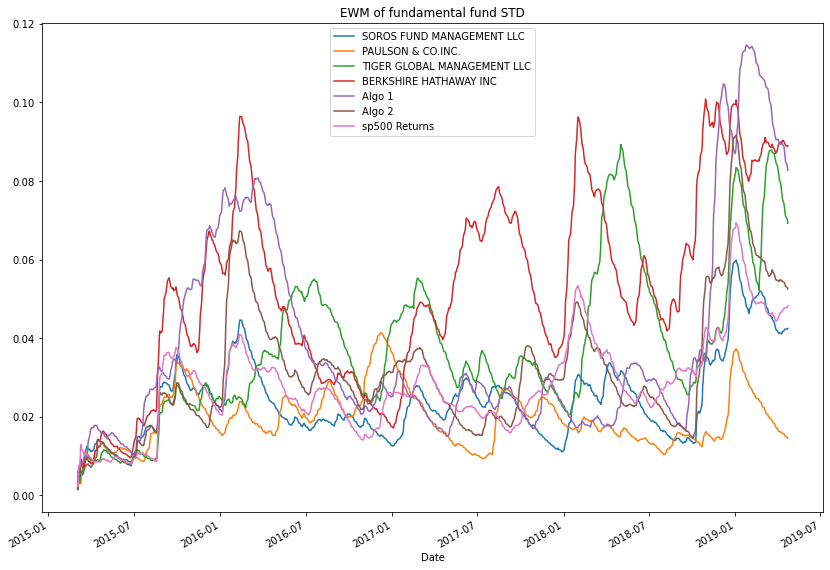

In [46]:
# plot rolling ewm of std
cumulative_returns.ewm(halflife=21).std().plot(figsize=(14,10), title='EWM of fundamental fund STD')

In [47]:
##  Sharpe Ratios

In [48]:
# sharpe ratio annualized
sharpeRatio = (cumulative_returns.mean() * 252) / (cumulative_returns.std() *np.sqrt(252))

<AxesSubplot:title={'center':'Fund Sharpe Ratios'}>

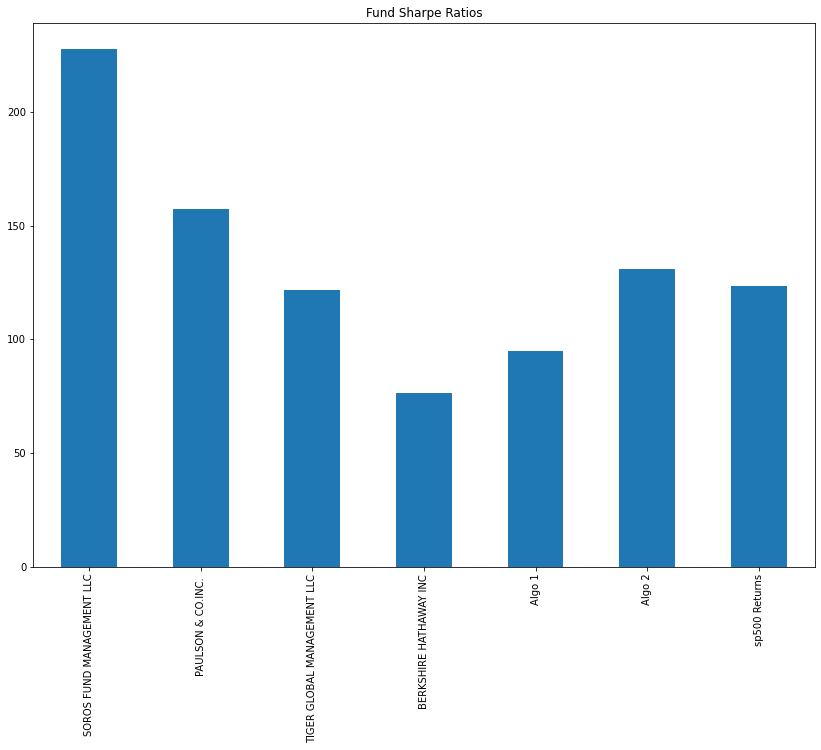

In [49]:
# Visualize the sharpe ratios as a bar plot
# bar plot
sharpeRatio.plot(kind='bar', title='Fund Sharpe Ratios', figsize= (14, 10))

In [50]:
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.


   # As far as risk adjusted performances 
   # both the algos beat Berkshire, 
   # only Algo 2 bests the S&P and Tiger
   # Soros and Paulson outperform all

In [51]:
## Create Custom Portfolio

In [52]:
# Choose 3-5 custom stocks with at last 1 year's worth of historic prices and 
# create a DataFrame of the closing prices and dates for each stock. 
!pip install tiingo
import os
from dotenv import load_dotenv
import requests



TIINGO_API_KEY = os.getenv("1b545063658e8ac3669f26afd4f3439ff66adb3f")
load_dotenv()

headers = {
        'Content-Type': 'application/json'
        }
requestResponse = requests.get("https://api.tiingo.com/api/test?token=1b545063658e8ac3669f26afd4f3439ff66adb3f",
                                    headers=headers)
print(requestResponse.json())

from tiingo import TiingoClient

config = {
    'api_key': '1b545063658e8ac3669f26afd4f3439ff66adb3f',
    'session': True # Reuse HTTP sessions across API calls for better performance
}
client = TiingoClient(config)
meta_data = client.get_crypto_metadata(['BTCUSD'], fmt='json')
book_data = crypto_price = client.get_crypto_top_of_book(['BTCUSD'])



{'message': 'You successfully sent a request'}


In [53]:
# Reading data from 1st stock
BTC_close = client.get_crypto_price_history(tickers = ['BTCUSD'], startDate='2016-12-1',
                                endDate='2020-02-22', resampleFreq='1Day')

BTC_close

BTC_close[0]['priceData']

[{'volumeNotional': 4950622.698717491,
  'tradesDone': 0.0,
  'date': '2016-12-01T00:00:00+00:00',
  'low': 727.0,
  'volume': 6671.45877519,
  'close': 742.06,
  'open': 741.6957982076701,
  'high': 754.8472859516744},
 {'volumeNotional': 5293711.19418697,
  'tradesDone': 0.0,
  'date': '2016-12-02T00:00:00+00:00',
  'low': 740.18,
  'volume': 7043.81828537,
  'close': 751.54,
  'open': 754.8217592289768,
  'high': 782.1219376633529},
 {'volumeNotional': 6477567.268078128,
  'tradesDone': 0.0,
  'date': '2016-12-03T00:00:00+00:00',
  'low': 750.77,
  'volume': 8412.53427717,
  'close': 769.99,
  'open': 774.698017086032,
  'high': 778.07},
 {'volumeNotional': 2276621.3153759474,
  'tradesDone': 0.0,
  'date': '2016-12-04T00:00:00+00:00',
  'low': 752.41,
  'volume': 2992.60113753,
  'close': 760.75,
  'open': 766.1295906968137,
  'high': 771.5439260141986},
 {'volumeNotional': 3027072.8377269,
  'tradesDone': 0.0,
  'date': '2016-12-05T00:00:00+00:00',
  'low': 746.788586088473,
  'vo

In [54]:
Historical_BTC=pd.DataFrame(BTC_close[0]['priceData'])

btc_historical = Historical_BTC.set_index('date')[['close']].rename(columns={'close':'BTC'})

btc_historical

,BTC
date,
2016-12-01T00:00:00+00:00,742.060000
2016-12-02T00:00:00+00:00,751.540000
2016-12-03T00:00:00+00:00,769.990000
2016-12-04T00:00:00+00:00,760.750000
2016-12-05T00:00:00+00:00,762.000000
...,...
2020-02-18T00:00:00+00:00,10170.966370
2020-02-19T00:00:00+00:00,9625.825394
2020-02-20T00:00:00+00:00,9604.269566


In [55]:

!pip install python-dateutil

pd.to_datetime(btc_historical.index).date

btc_historical.index = pd.to_datetime(btc_historical.index).date

btc_historical

,BTC
2016-12-01,742.060000
2016-12-02,751.540000
2016-12-03,769.990000
2016-12-04,760.750000
2016-12-05,762.000000
...,...
2020-02-18,10170.966370
2020-02-19,9625.825394
2020-02-20,9604.269566
2020-02-21,9682.749937


In [56]:
# Reading data from 2nd stock
history_data_ETH = client.get_crypto_price_history(tickers = ['ETHUSD'], startDate='2016-12-1',
                                endDate='2020-02-22', resampleFreq='1Day')

history_data_ETH[0]['priceData']

Historical_Crypto_ETH = pd.DataFrame(history_data_ETH[0]['priceData'])

eth_historical = Historical_Crypto_ETH.set_index('date')[['close']].rename(columns={'close':'ETH'})

pd.to_datetime(eth_historical.index).date

eth_historical.index = pd.to_datetime(eth_historical.index).date

eth_historical

,ETH
2016-12-01,8.410000
2016-12-02,7.708713
2016-12-03,7.884434
2016-12-04,7.427162
2016-12-05,6.800000
...,...
2020-02-18,282.707529
2020-02-19,259.799816
2020-02-20,257.529210
2020-02-21,265.145506


In [57]:
 # Reading data from 3rd stock
history_data_XRP = client.get_crypto_price_history(tickers = ['XRPUSD'], startDate='2016-12-1',
                                endDate='2020-02-22', resampleFreq='1Day')


history_data_XRP[0]['priceData']

Historical_Crypto_XRP = pd.DataFrame(history_data_XRP[0]['priceData'])

xrp_historical = Historical_Crypto_XRP.set_index('date')[['close']].rename(columns={'close':'XRP'})

pd.to_datetime(xrp_historical.index).date

xrp_historical.index = pd.to_datetime(xrp_historical.index).date

xrp_historical    
    
    

,XRP
2016-12-01,0.006604
2016-12-02,0.006558
2016-12-03,0.006520
2016-12-04,0.006423
2016-12-05,0.006304
...,...
2020-02-18,0.298522
2020-02-19,0.275610
2020-02-20,0.271010
2020-02-21,0.274141


In [58]:
 # Reading data from 5th stock
history_data_DOT = client.get_crypto_price_history(tickers = ['DOTUSD'], startDate='2016-12-1',
                                endDate='2020-02-22', resampleFreq='1Day')

history_data_DOT[0]['priceData']

Historical_Crypto_DOT = pd.DataFrame(history_data_DOT[0]['priceData'])

dot_historical = Historical_Crypto_DOT.set_index('date')[['close']].rename(columns={'close':'DOT'})

pd.to_datetime(dot_historical.index).date

dot_historical.index = pd.to_datetime(dot_historical.index).date

dot_historical

,DOT
2017-03-09,0.000272
2017-03-10,0.000225
2017-03-11,0.000225
2017-03-12,0.000225
2017-03-13,0.000226
...,...
2019-01-04,0.006267
2019-01-05,0.006253
2019-01-06,0.006000
2019-01-12,0.005339


In [59]:
 # Combine all stocks in a single DataFrame
crypto_history = pd.concat(
    [dot_historical, 
     xrp_historical, 
     eth_historical, 
     btc_historical], axis="columns", join="inner")

crypto_history

,DOT,XRP,ETH,BTC
2017-03-09,0.000272,0.006457,17.734437,1150.050000
2017-03-10,0.000225,0.006200,19.398888,1190.890000
2017-03-11,0.000225,0.006230,21.310000,1116.970000
2017-03-12,0.000225,0.006258,23.240000,1176.550000
2017-03-13,0.000226,0.006419,28.400000,1226.620000
...,...,...,...,...
2019-01-04,0.006267,0.357600,154.501748,3787.810000
2019-01-05,0.006253,0.353000,154.963626,3817.710000
2019-01-06,0.006000,0.366456,157.017373,3791.840000
2019-01-12,0.005339,0.327801,124.520494,3609.487226


In [60]:
 # Reset Date index (already done... sorry :-D )

In [61]:
 # Reorganize portfolio data by having a column per symbol  (already done... sorry :-D )

In [62]:
# Calculate daily returns
crypto_returns = crypto_history.pct_change() 

# Drop NAs
crypto_returns = crypto_returns.dropna().copy()    
# Display sample data
crypto_returns

,DOT,XRP,ETH,BTC
2017-03-10,-0.173414,-0.039796,0.093854,0.035511
2017-03-11,0.001380,0.004821,0.098517,-0.062071
2017-03-12,0.000267,0.004560,0.090568,0.053341
2017-03-13,0.005912,0.025601,0.222031,0.042557
2017-03-14,0.039638,-0.001343,0.010056,0.012914
...,...,...,...,...
2019-01-04,0.001770,-0.042871,-0.006650,-0.009319
2019-01-05,-0.002213,-0.012865,0.002989,0.007894
2019-01-06,-0.040488,0.038119,0.013253,-0.006776
2019-01-12,-0.110210,-0.105483,-0.206964,-0.048091


In [63]:
##  Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

In [65]:
# Calculate portfolio return
weighted_returns = (weights * crypto_returns)
weighted_returns





,DOT,XRP,ETH,BTC
2017-03-10,-0.043353,-0.009949,0.023464,0.008878
2017-03-11,0.000345,0.001205,0.024629,-0.015518
2017-03-12,0.000067,0.001140,0.022642,0.013335
2017-03-13,0.001478,0.006400,0.055508,0.010639
2017-03-14,0.009909,-0.000336,0.002514,0.003228
...,...,...,...,...
2019-01-04,0.000442,-0.010718,-0.001662,-0.002330
2019-01-05,-0.000553,-0.003216,0.000747,0.001973
2019-01-06,-0.010122,0.009530,0.003313,-0.001694
2019-01-12,-0.027553,-0.026371,-0.051741,-0.012023


In [66]:
## Calculate cumulative returns of all portfolios
cumulative_crypto_returns = (1 + weighted_returns).cumprod()
cumulative_crypto_returns

,DOT,XRP,ETH,BTC
2017-03-10,0.956647,0.990051,1.023464,1.008878
2017-03-11,0.956977,0.991244,1.048671,0.993222
2017-03-12,0.957040,0.992374,1.072415,1.006467
2017-03-13,0.958455,0.998726,1.131942,1.017175
2017-03-14,0.967953,0.998391,1.134788,1.020459
...,...,...,...,...
2019-01-04,6.996138,5.163237,2.259542,1.549737
2019-01-05,6.992267,5.146630,2.261230,1.552795
2019-01-06,6.921491,5.195677,2.268722,1.550165
2019-01-12,6.730786,5.058663,2.151337,1.531527


<AxesSubplot:title={'center':'Cumulative Crypto Returns'}>

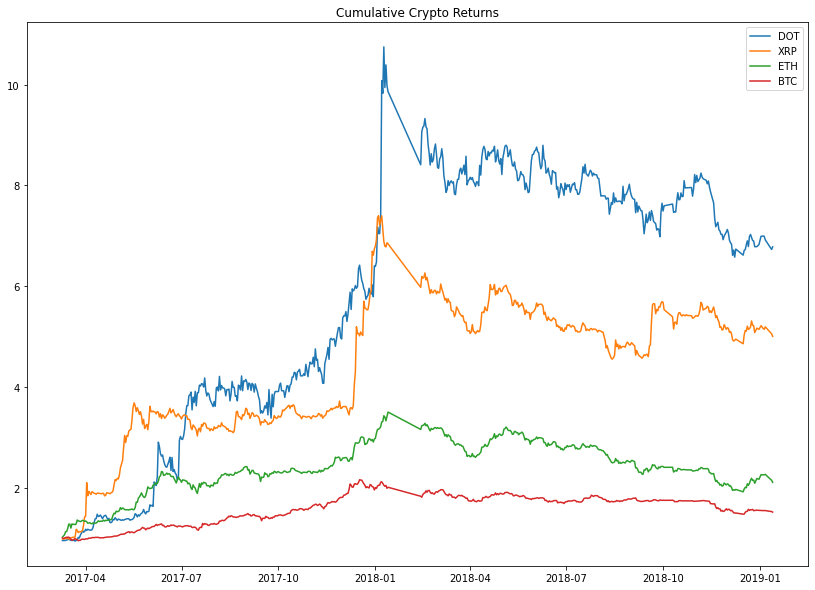

In [67]:
# Display sample data
cumulative_crypto_returns.plot(figsize=(14, 10), title='Cumulative Crypto Returns')

In [68]:
## Join your portfolio returns to the DataFrame that contains all of the portfolio returns
 # Join your returns DataFrame to the original returns DataFrame
#  cumulative_returns  cumulative_crypto_returns
all_portfolios = pd.concat([cumulative_returns, cumulative_crypto_returns], axis="columns", join="inner")
all_portfolios

C:\Users\16177\anaconda3\envs\project\lib\site-packages\pandas\core\indexes\base.py:334: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns,DOT,XRP,ETH,BTC
2017-03-10,1.036580,0.879700,1.377238,1.036799,1.434315,1.082182,1.120530,0.956647,0.990051,1.023464,1.008878
2017-03-13,1.039019,0.878722,1.373593,1.048127,1.432171,1.090427,1.120941,0.958455,0.998726,1.131942,1.017175
2017-03-14,1.033693,0.875494,1.370246,1.042650,1.433113,1.082601,1.117154,0.967953,0.998391,1.134788,1.020459
2017-03-15,1.043049,0.881182,1.381284,1.049958,1.440956,1.095842,1.126510,0.972807,0.992113,1.196742,1.021157
2017-03-16,1.045089,0.879099,1.391253,1.056997,1.441900,1.097931,1.124677,0.982921,0.995968,1.282774,1.023505
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.958361,0.711647,0.894781,1.186115,1.638121,1.020186,1.165444,6.897933,5.219647,2.155891,1.548834
2018-12-27,0.962371,0.706329,0.902967,1.191824,1.640693,1.020690,1.175424,6.785590,5.081812,2.092518,1.551909
2018-12-31,0.970273,0.710965,0.895666,1.191207,1.676020,1.038525,1.183934,6.827209,5.145456,2.171669,1.554607
2019-01-02,0.976121,0.721934,0.902724,1.189356,1.760394,1.057242,1.185436,6.993044,5.219175,2.263304,1.553356


In [69]:
 # Only compare dates where return data exists for all the stocks (drop NaNs)

In [70]:
all_portfolios = all_portfolios.dropna().copy()
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500 Returns,DOT,XRP,ETH,BTC
2017-03-10,1.036580,0.879700,1.377238,1.036799,1.434315,1.082182,1.120530,0.956647,0.990051,1.023464,1.008878
2017-03-13,1.039019,0.878722,1.373593,1.048127,1.432171,1.090427,1.120941,0.958455,0.998726,1.131942,1.017175
2017-03-14,1.033693,0.875494,1.370246,1.042650,1.433113,1.082601,1.117154,0.967953,0.998391,1.134788,1.020459
2017-03-15,1.043049,0.881182,1.381284,1.049958,1.440956,1.095842,1.126510,0.972807,0.992113,1.196742,1.021157
2017-03-16,1.045089,0.879099,1.391253,1.056997,1.441900,1.097931,1.124677,0.982921,0.995968,1.282774,1.023505
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-26,0.958361,0.711647,0.894781,1.186115,1.638121,1.020186,1.165444,6.897933,5.219647,2.155891,1.548834
2018-12-27,0.962371,0.706329,0.902967,1.191824,1.640693,1.020690,1.175424,6.785590,5.081812,2.092518,1.551909
2018-12-31,0.970273,0.710965,0.895666,1.191207,1.676020,1.038525,1.183934,6.827209,5.145456,2.171669,1.554607
2019-01-02,0.976121,0.721934,0.902724,1.189356,1.760394,1.057242,1.185436,6.993044,5.219175,2.263304,1.553356


In [71]:
##  Re-run the risk analysis with your portfolio to see how it compares to the others

In [72]:
 # Calculate the annualized `std`
annualized_std_all = all_portfolios.std() * np.sqrt(365) #this is probably gonna screw things up, crypto is 24/7/365 not stocks
annualized_std_all

SOROS FUND MANAGEMENT LLC       0.775554
PAULSON & CO.INC.               0.738973
TIGER GLOBAL MANAGEMENT LLC     2.406336
BERKSHIRE HATHAWAY INC          3.024030
Algo 1                          1.686067
Algo 2                          1.538788
sp500 Returns                   1.479852
DOT                            50.129472
XRP                            25.844818
ETH                             9.774792
BTC                             5.729764
dtype: float64

In [73]:
 # Calculate rolling standard deviation

all_rolling_std = all_portfolios.rolling(window=21).std()    

<AxesSubplot:title={'center':'21 day rolling STD'}>

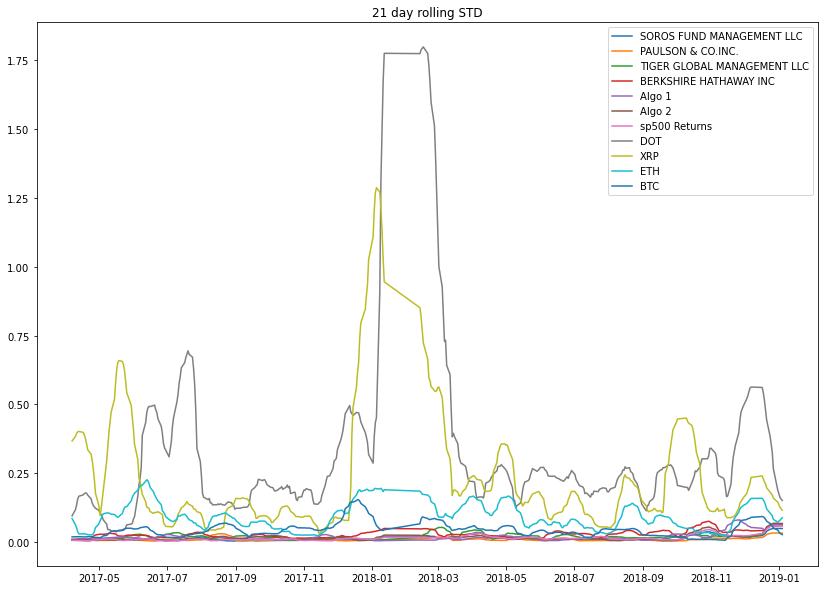

In [74]:
# Plot rolling standard deviation
all_rolling_std.plot(figsize=(14, 10), title='21 day rolling STD')

In [75]:
# Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500
covariance = cumulative_crypto_returns.rolling(window=21).cov(cumulative_returns['sp500 Returns'])
variance = cumulative_returns['sp500 Returns'].rolling(window=20).var()
# Calculate and plot Beta
beta = covariance / variance


In [76]:
##  Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
# sharpe ratio annualized
# Calculate Annualzied Sharpe Ratios
sharpeRatio = (cumulative_crypto_returns.mean() * 365) / (cumulative_crypto_returns.std() *np.sqrt(365))



<AxesSubplot:title={'center':'Crypto Sharpe Ratios'}>

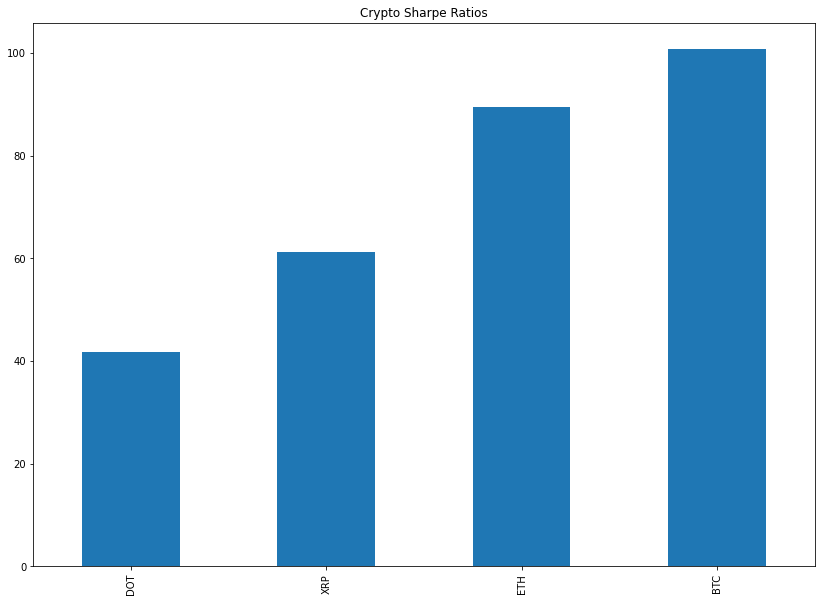

In [77]:
 # Visualize the sharpe ratios as a bar plot
sharpeRatio.plot(kind='bar', title='Crypto Sharpe Ratios', figsize= (14, 10))    

<AxesSubplot:title={'center':'Cumulative Returns'}>

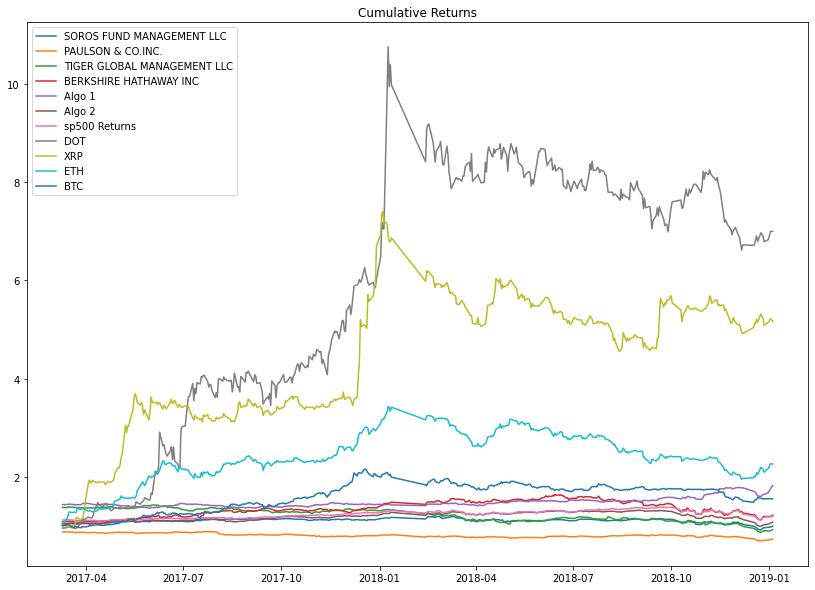

In [78]:
all_portfolios.plot(figsize=(14, 10), title='Cumulative Returns')

In [79]:
 ## How does your portfolio do?
# Crushed those investing nubs...  
# I also had a sliiiiiightly higher risk tolerance